In [1]:
import pandas as pd

df = pd.read_csv("../data/iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
df.shape


(150, 6)

In [5]:
df.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
X = df.drop('Species',axis=1)
y = df['Species']
X.head(), y.head()

(   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 0   1            5.1           3.5            1.4           0.2
 1   2            4.9           3.0            1.4           0.2
 2   3            4.7           3.2            1.3           0.2
 3   4            4.6           3.1            1.5           0.2
 4   5            5.0           3.6            1.4           0.2,
 0    Iris-setosa
 1    Iris-setosa
 2    Iris-setosa
 3    Iris-setosa
 4    Iris-setosa
 Name: Species, dtype: object)

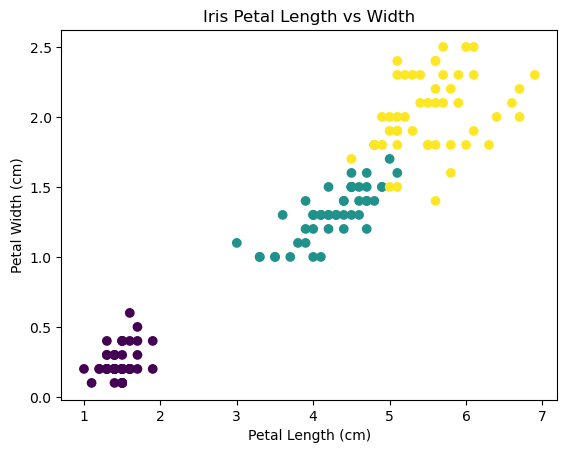

In [10]:
import matplotlib.pyplot as plt

plt.scatter(
    df['PetalLengthCm'],
    df['PetalWidthCm'],
    c=df['Species'].astype('category').cat.codes
)

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Iris Petal Length vs Width")
plt.show()


In [11]:
df = df.drop('Id', axis=1)


In [12]:
X = df.drop('Species', axis=1)
y = df['Species']

X.head(), y.head()


(   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 0            5.1           3.5            1.4           0.2
 1            4.9           3.0            1.4           0.2
 2            4.7           3.2            1.3           0.2
 3            4.6           3.1            1.5           0.2
 4            5.0           3.6            1.4           0.2,
 0    Iris-setosa
 1    Iris-setosa
 2    Iris-setosa
 3    Iris-setosa
 4    Iris-setosa
 Name: Species, dtype: object)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [18]:
X_train.shape, X_test.shape


((120, 4), (30, 4))

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [21]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy


1.0

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)


In [25]:
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))



Accuracy: 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [26]:
print("Logistic Regression Accuracy:", accuracy)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))



Logistic Regression Accuracy: 1.0
KNN Accuracy: 1.0
